In [110]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression , Ridge, LogisticRegression
from sklearn.metrics import mean_squared_error, log_loss, classification_report

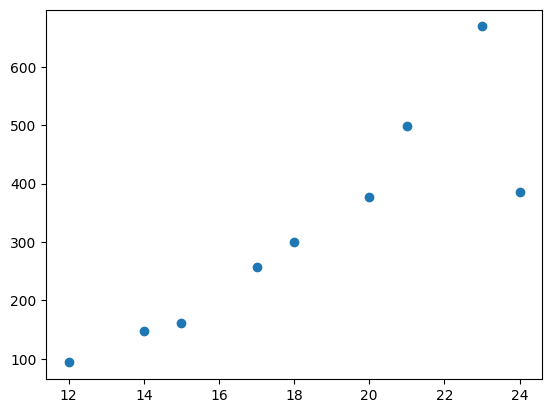

In [103]:
data = pd.read_csv('lin_reg_training.csv')
x_train = data.values[:,0].reshape(-1,1)
y_train = data.values[:,1].reshape(-1,1)

plt.scatter(x_train,y_train)



In [104]:
model = Pipeline([('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression',LinearRegression())])

model.fit(x_train,y_train)



Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression', LinearRegression())])

28.533435090306423


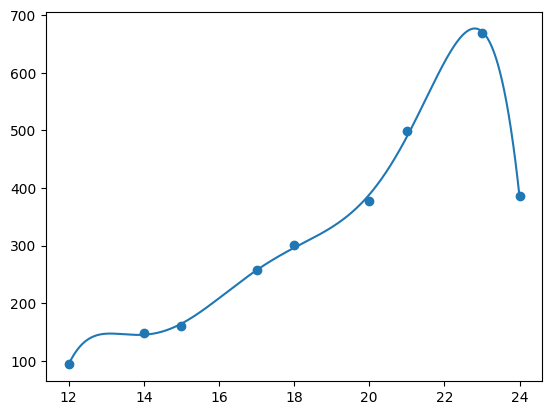

In [105]:
x_reg = np.linspace(x_train.min(),x_train.max(),1000).reshape(-1,1)
y_reg = model.predict(x_reg)

y_pred = model.predict(x_train)

cost_train = mean_squared_error(y_train,y_pred)
print(cost_train)

plt.plot(x_reg,y_reg.reshape(-1))
plt.scatter(x_train,y_train)


14128.20173711342


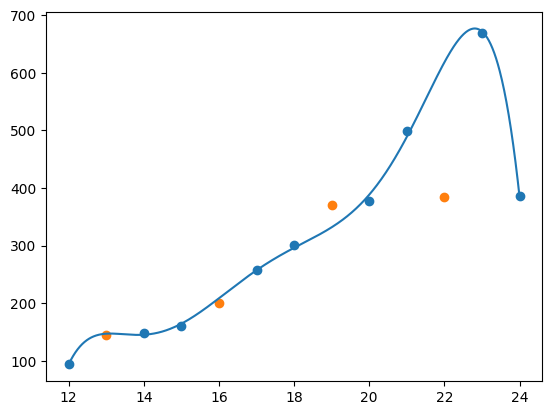

In [106]:
data_test = pd.read_csv('lin_reg_test.csv')

x_test = data_test.values[:,0].reshape(-1,1)
y_test = data_test.values[:,1].reshape(-1,1)

y_pred = model.predict(x_test)

cost_test = mean_squared_error(y_test,y_pred)
print(cost_test)


plt.plot(x_reg,y_reg.reshape(-1))
plt.scatter(x_train,y_train)
plt.scatter(x_test,y_test)

Lambda: 0,cost: 28.533435090306423, test_cost:14128.20173711342 
Lambda: 10,cost: 11499.18583716412, test_cost:3326.953111307321 
Lambda: 1,cost: 1992.7152598167481, test_cost:6224.039012344677 
Lambda: 0.01,cost: 34.31220362917298, test_cost:14203.321342718667 
Lambda: 0.001,cost: 28.624102362761228, test_cost:14147.040291815167 
Lambda: 0.0001,cost: 28.534397519029962, test_cost:14130.246722233524 


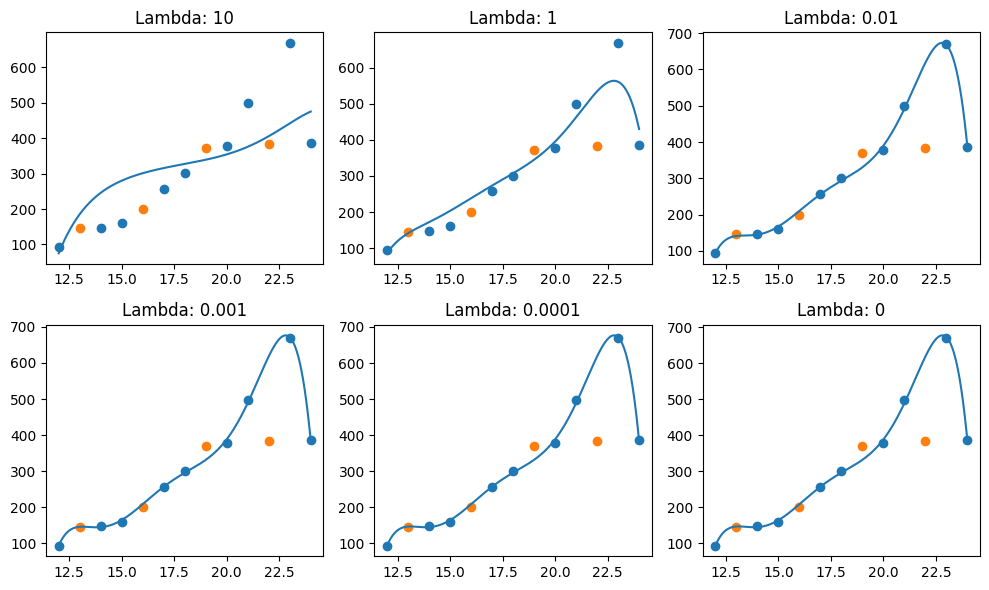

In [107]:
def create_model_with_reg(lambda_):
    model = Pipeline([('scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree=6)),
                    ('regression',Ridge(alpha=lambda_))])
    
    return model
lambdas = [10,1,0.01,0.001,0.0001]
y_regs = []

print(f'Lambda: 0,cost: {cost_train}, test_cost:{cost_test} ' )

for lambda_ in lambdas:
    model_reg = create_model_with_reg(lambda_)

    model_reg.fit(x_train,y_train)

    x_reg = np.linspace(x_train.min(),x_train.max(),1000).reshape(-1,1)
    y_reg = model_reg.predict(x_reg)

    y_pred = model_reg.predict(x_train)

    cost_train = mean_squared_error(y_train,y_pred)

    y_pred = model_reg.predict(x_test)

    cost_test = mean_squared_error(y_test,y_pred)

    print(f'Lambda: {lambda_},cost: {cost_train}, test_cost:{cost_test} ' )

    y_regs.append(y_reg)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
j = 0
axes = axes.flatten()

x_reg_0 = np.linspace(x_train.min(),x_train.max(),1000).reshape(-1,1)
y_reg_0 = model.predict(x_reg)

y_pred_0 = model.predict(x_train)

for i in range(len(y_regs)):

    axes[i].plot(x_reg,y_regs[i])
    axes[i].scatter(x_train,y_train)
    axes[i].scatter(x_test,y_test)
    axes[i].set_title(f"Lambda: {lambdas[i]}")



axes[5].plot(x_reg_0,y_reg_0)
axes[5].scatter(x_train,y_train)
axes[5].scatter(x_test,y_test)
axes[5].set_title(f"Lambda: 0")

    
plt.tight_layout()  
plt.show()






Regularyzacja dla Regresji Logistycznej

In [108]:
data_train_log = pd.read_csv('logi_reg_training.csv')
x1_train = data_train_log.values[:,0].reshape(-1,1)
x2_train = data_train_log.values[:,1].reshape(-1,1)
y_train = data_train_log.values[:,2].reshape(-1,1)

data_test_log = pd.read_csv('logi_reg_test.csv')
x1_test = data_test_log.values[:,0].reshape(-1,1)
x2_test = data_test_log.values[:,1].reshape(-1,1)
y_test = data_test_log.values[:,2].reshape(-1,1)

x_train = np.concatenate([x1_train, x2_train], axis=1)
x_test = np.concatenate([x1_test, x2_test], axis=1)


Lambda: 0,cost: 28.534397519029962, test_cost:14130.246722233524 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 10000000000.0, test_cost:0.5 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 10, test_cost:0.05 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 1, test_cost:0.0 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 0.01, test_cost:0.1 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 0.001, test_cost:0.35 


c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Lambda: 0.0001, test_cost:0.45 


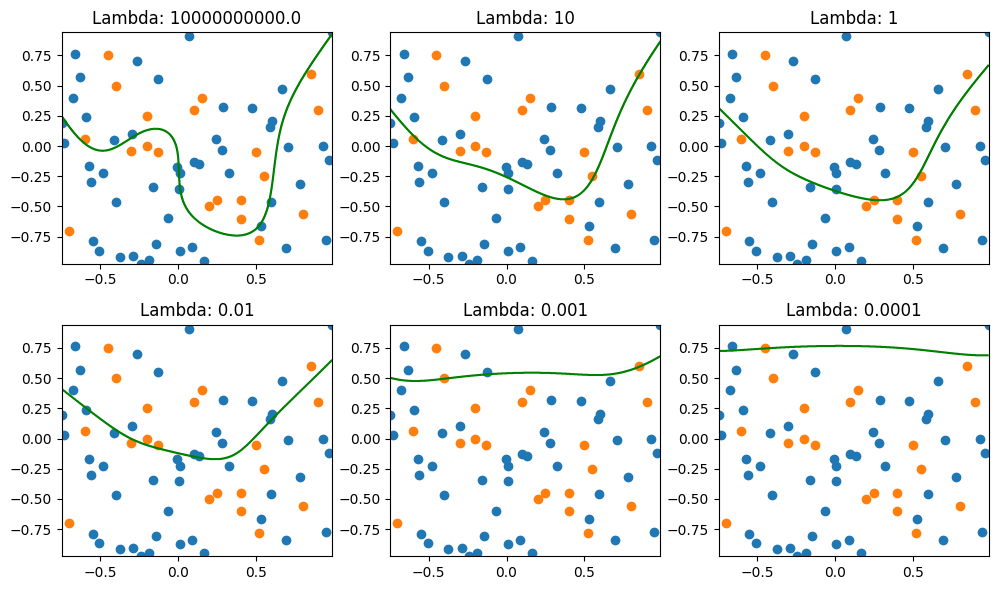

In [109]:

def create_model_with_reg_log(lambda_):
    model = Pipeline([('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=6)),
                ('regression',LogisticRegression(C=lambda_))])
    
    return model
lambdas = [1e10,10,1,0.01,0.001,0.0001]
y_regs = []

print(f'Lambda: 0,cost: {cost_train}, test_cost:{cost_test} ' )

for lambda_ in lambdas:
    model_reg = create_model_with_reg_log(lambda_)

    model_reg.fit(x_train,y_train)

    

    
    x1_range = np.linspace(x1_train.min(), x1_train.max(), 1000)
    x2_range = np.linspace(x2_train.min(), x2_train.max(), 1000)
    x1x1, x2x2 = np.meshgrid(x1_range, x2_range)
    points = np.c_[x1x1.ravel(), x2x2.ravel()]

    # x_reg = np.concatenate([x1_test, x2_test], axis=1)
    y_reg = model_reg.predict(points)
    y_reg=y_reg.reshape(x1x1.shape)

    y_pred = model_reg.predict(x_test)
    cost_test = mean_squared_error(y_test, y_pred)

    # y_pred = model_reg.predict(x_test)
    # cost_test = mean_squared_error(y_test, y_pred)

    # cost_train = mean_squared_error(y_train,y_pred)

    # y_pred = model_reg.predict(x_test)

    # cost_test = mean_squared_error(y_test,y_pred)

    print(f'Lambda: {lambda_}, test_cost:{cost_test} ' )

    y_regs.append(y_reg)

fig, axes = plt.subplots(2, 3, figsize=(10, 6))


axes = axes.flatten()

# x_reg_0 = np.linspace(x_train.min(),x_train.max(),1000).reshape(-1,1)
# y_reg_0 = model.predict(x_reg)

# y_pred_0 = model.predict(x_train)

for i in range(len(y_regs)):

    # axes[i].plot(x_reg,y_regs[i])
    axes[i].contour(x1x1, x2x2, y_regs[i], levels=[0.5], colors='g')
    axes[i].scatter(x1_train,x2_train)
    axes[i].scatter(x1_test,x2_test)
    axes[i].set_title(f"Lambda: {lambdas[i]}")



# axes[5].plot(x_reg_0,y_reg_0)
# axes[5].scatter(x_train,y_train)
# axes[5].scatter(x_test,y_test)
# axes[5].set_title(f"Lambda: 0")

    
plt.tight_layout()  # Poprawia wygląd
plt.show()

IRIS dataset

In [114]:
from sklearn.datasets import load_iris
 
data = load_iris()
x = data.data
y = data.target

model_iris = Pipeline([('scaler', StandardScaler()),
                ('regression',LogisticRegression(penalty=None))])

In [119]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12345)
# standard_scaler = StandardScaler()
# x_train = standard_scaler.fit_transform(x_train)
# x_test = standard_scaler.transform(x_test)
a = 0


In [130]:

model_iris.fit(x_train, y_train)
y_train_probab = model_iris.predict_proba(x_train)
y_test_probabs = model_iris.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model_iris.predict(x_test)
print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.04550645668061371, cost_test=0.041030184250738864
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        17
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [122]:
model_iris_poly = Pipeline([('scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree=6)),
                ('regression',LogisticRegression(penalty=None))])

In [128]:
model_iris_poly.fit(x_train, y_train)
y_train_probab = model_iris_poly.predict_proba(x_train)
y_test_probabs = model_iris_poly.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model_iris_poly.predict(x_test)
print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.0003284485626296978, cost_test=1.0816262075815999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [129]:
model_iris_poly = Pipeline([('scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree=6)),
                ('regression',LogisticRegression(penalty=None,C = 1))])

model_iris_poly.fit(x_train, y_train)
y_train_probab = model_iris_poly.predict_proba(x_train)
y_test_probabs = model_iris_poly.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model_iris_poly.predict(x_test)
print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.0003284485626296978, cost_test=1.0816262075815999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



In [131]:
model_iris_poly = Pipeline([('scaler', StandardScaler()),
                    ('poly_features', PolynomialFeatures(degree=6)),
                ('regression',LogisticRegression(penalty=None,C = 0.001))])

model_iris_poly.fit(x_train, y_train)
y_train_probab = model_iris_poly.predict_proba(x_train)
y_test_probabs = model_iris_poly.predict_proba(x_test)

cost_train = log_loss(y_train, y_train_probab)
cost_test = log_loss(y_test, y_test_probabs)
y_test_pred = model_iris_poly.predict(x_test)
print(f'{cost_train=}, {cost_test=}')
print(classification_report(y_test, y_test_pred))

cost_train=0.0003284485626296978, cost_test=1.0816262075815999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.88      0.94        17
           2       0.86      1.00      0.92        12

    accuracy                           0.96        45
   macro avg       0.95      0.96      0.95        45
weighted avg       0.96      0.96      0.96        45



c:\Users\pawel\anaconda3\envs\MLlabs\Lib\site-packages\sklearn\linear_model\_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
